# Weighted K-Means

In this exercise we will simulate finding good locations for production plants of a company in order to minimize its logistical costs. In particular, we would like to place production plants near customers so as to reduce shipping costs and delivery time.

We assume that the probability of someone being a customer is independent of its geographical location and that the overall cost of delivering products to customers is proportional to the squared Euclidean distance to the closest production plant. Under these assumptions, the K-Means algorithm is an appropriate method to find a good set of locations. Indeed, K-Means finds a spatial clustering of potential customers and the centroid of each cluster can be chosen to be the location of the plant.

Because there are potentially millions of customers, and that it is not scalable to model each customer as a data point in the K-Means procedure, we consider instead as many points as there are geographical locations, and assign to each geographical location a weight $w_i$ corresponding to the number of inhabitants at that location. The resulting problem becomes a weighted version of K-Means where we seek to minimize the objective:

$$
J(c_1,\dots,c_K) = \frac{\sum_{i} w_i \min_k ||x_i-c_k||^2}{\sum_{i} w_i},
$$

where $c_k$ is the $k$th centroid, and $w_i$ is the weight of each geographical coordinate $x_i$. In order to minimize this cost function, we iteratively perform the following EM computations:

* **Expectation step:** Compute the set of points associated to each centroid:
$$
\forall~1 \leq k \leq K: \quad \mathcal{C}(k) \leftarrow \Big\{ i ~:~ k = \mathrm{arg}\min_k \| x_i - c_k \|^2 \Big\}
$$


* **Minimization step:** Recompute the centroid as a the (weighted) mean of the associated data points:
$$
\forall~1 \leq k \leq K: \quad c_k \leftarrow \frac{\sum_{i \in \mathcal{C}(k)} w_i \cdot x_i}{\sum_{i \in \mathcal{C}(k)} w_i}
$$


until the objective $J(c_1,\dots,c_K)$ has converged.


## Getting started

In this exercise we will use data from http://sedac.ciesin.columbia.edu/, that we store in the files `data.mat` as part of the zip archive. The data contains for each geographical coordinates (latitude and longitude), the number of inhabitants and the corresponding country. Several variables and methods are provided in the file `utils.py`:


*  **`utils.population`** A 2D array with the number of inhabitants at each latitude/longitude.


*  **`utils.countries`** A 2D array with the country indicator at each latitude/longitude.


* **`utils.nx`** The number of latitudes considered.


* **`utils.ny`** The number of longitudes considered.


*  **`utils.plot(latitudes,longitudes)`** Plot a list of centroids given as geographical coordinates in overlay to the population density map.

The code below plots three factories (white squares) with geographical coordinates (60,80),
(60,90),(60,100) given as input.

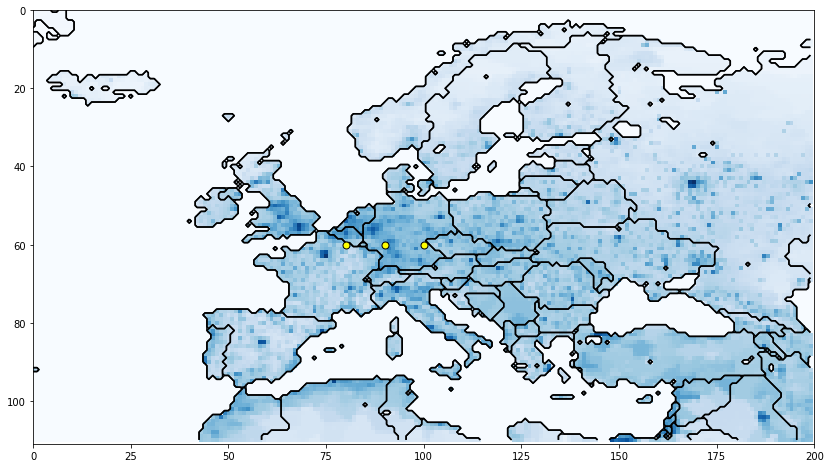

In [2]:
import utils
%matplotlib inline
utils.plot([60,60,60],[80,90,100])

## Initializing Weighted K-Means (30 P)

Because K-means has a non-convex objective, choosing a good initial set of centroids is important. Centroids are drawn from from the following discrete probability distribution:

$$
P(x,y) = \frac1Z \cdot \text{population}(x,y)
$$

where $Z$ is a normalization constant. Furthermore, to avoid identical centroids, we add a small Gaussian noise to the location of centroids, with standard deviation $0.01$.

**Tasks:**

* **Implement the initialization procedure above.**
* **Run the initialization procedure for K=200 clusters.**
* **Visualize the centroids obtained with your initialization procedure using `utils.plot`.**

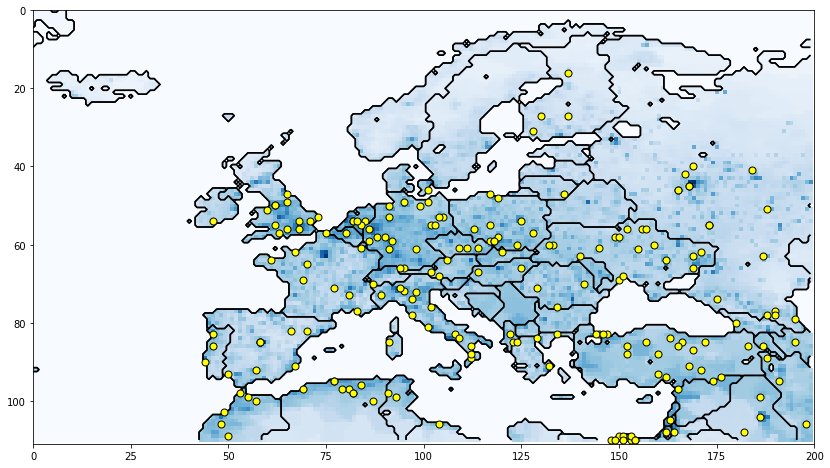

In [43]:
# YOUR CODE HERE
%matplotlib inline
import numpy as np
M = utils.population
z = np.sum(M)
def P(x,y): 
    return 1/z * M[x][y]

w = []
(a,b) = M.shape 
for i in range(0,utils.nx):
    for j in range(0,utils.ny):
        w.append(P(i,j))
        
def sample(k):     
    A = np.random.choice(np.arange(0,a*b), size= k , p=w)
    A = [(int(x/b)+np.random.normal(0,0.01), (x%b)+np.random.normal(0,0.01)) for x in A]
    A = np.array([*A]).transpose()
    return A
A = sample(200)
utils.plot(A[0],A[1])
# --------------

## Implementing Weighted K-Means (70 P)

**Tasks:**


* **Implement the weighted K-Means algorithm as described in the introduction.**


* **Run the algorithm with K=200 centroids until convergence (stop if the objective does not improve by more than 0.01). Convergence should occur after less than 50 iterations. If it takes longer, something must be wrong.**


* **Print the value of the objective function at each iteration.**


* **Visualize the centroids at the end of the training procedure using the methods `utils.plot`.**

In [52]:
# YOUR CODE HERE
%matplotlib inline
def J(c):
    z = np.sum(utils.population)
    s = 0 
    for i in range(0,utils.nx):
        for j in range(0,utils.ny):
            s = s + M[i][j]*np.amin(np.linalg.norm(np.array([[i],[j]])- c)**2)
    return s/z
#print(A)
#print(J(A))

def expectation(c):
    C = list()
    for i in range(len(c[0])):
        C.append([])
    for i in range(0, utils.nx):
        for j in range(0,utils.ny):
            k = np.argmin(np.linalg.norm(np.array([[i],[j]])- c, axis = 0)**2)
            print(np.linalg.norm(np.array([[i],[j]])- c)**2)
            C[k].append(np.array([[i],[j]])) 
    #print([c for c in C if len(c) == 0])
    return C
def minimization(C):
    M = utils.population
    c = []
    print(len(C))
    
    for k in range(len(C)):
        s = 0
        n = 0
        for j in C[k]: 
            s = s + M[j[0,0]][j[1,0]] * j
            n = n + M[j[0,0]][j[1,0]]
        if n > 0:
            c.append(s/n)
        else:
            c.append(np.array([[0],[0]]))
    print('jkjk', len(C))                  
    c = np.array(c).transpose()
    return c

                      
def kmean(K):
    c = sample(K)
    b = J(c)
    e = 0 
    ite = 0
    while b- e > 0.01: 
        print('Iteration = {}'.format(ite))
        print('\tCompute expectation')
        C = expectation(c)
        #print(len(C))
        print('\tCompute minimization')
        c = minimization(C)
        b = e
        e = J(c)
    return c

print("kmean", kmean(200))                  
                      
                
                      
                      
                      
                    
    

Iteration = 0
	Compute expectation
4345419.801439962
4297223.6509551685
4249427.5004703775
4202031.349985585
4155035.1995007927
4108439.049016002
4062242.898531209
4016446.748046418
3971050.5975616267
3926054.4470768343
3881458.296592042
3837262.1461072504
3793465.9956224593
3750069.845137667
3707073.694652875
3664477.5441680825
3622281.393683292
3580485.2431984986
3539089.0927137076
3498092.942228916
3457496.791744123
3417300.6412593317
3377504.4907745398
3338108.340289748
3299112.189804956
3260516.039320165
3222319.888835373
3184523.738350581
3147127.5878657885
3110131.437380997
3073535.286896205
3037339.1364114136
3001542.9859266216
2966146.8354418296
2931150.6849570377
2896554.5344722457
2862358.3839874538
2828562.2335026613
2795166.08301787
2762169.932533079
2729573.782048287
2697377.631563495
2665581.481078703
2634185.330593911
2603189.180109119
2572593.0296243276
2542396.8791395356
2512600.728654743
2483204.578169952
2454208.42768516
2425612.2772003687
2397416.1267155763
2369619

1387573.964421896
1376577.8139371045
1365981.6634523126
1355785.5129675209
1345989.362482729
1336593.211997937
1327597.0615131452
1319000.9110283537
1310804.7605435618
1303008.6100587696
1295612.4595739783
1288616.3090891864
1282020.158604394
1275824.0081196027
1270027.8576348103
1264631.7071500188
1259635.5566652268
1255039.4061804346
1250843.2556956434
1247047.1052108516
1243650.9547260595
1240654.8042412675
1238058.6537564758
1235862.5032716836
1234066.3527868923
1232670.2023021
1231674.0518173084
1231077.9013325165
1230881.7508477247
1231085.6003629325
1231689.4498781408
1232693.299393349
1234097.1489085576
1235900.9984237652
1238104.8479389735
1240708.6974541815
1243712.5469693898
1247116.3964845983
1250920.245999806
1255124.0955150146
1259727.9450302222
1264731.7945454307
1270135.6440606385
1275939.4935758468
1282143.3430910553
1288747.1926062636
1295751.0421214716
1303154.8916366794
1310958.7411518877
1319162.5906670962
1327766.4401823042
1336770.2896975118
1346174.13921272
1355

1266142.64875588
1255146.4982710886
1244550.3477862966
1234354.1973015047
1224558.046816713
1215161.896331921
1206165.7458471295
1197569.5953623375
1189373.4448775456
1181577.2943927536
1174181.1439079617
1167184.9934231702
1160588.8429383785
1154392.6924535865
1148596.5419687948
1143200.3914840023
1138204.2409992109
1133608.0905144187
1129411.940029627
1125615.7895448352
1122219.6390600435
1119223.4885752515
1116627.3380904598
1114431.1876056679
1112635.037120876
1111238.8866360842
1110242.7361512925
1109646.5856665007
1109450.4351817085
1109654.2846969168
1110258.1342121249
1111261.983727333
1112665.833242541
1114469.6827577492
1116673.5322729575
1119277.3817881658
1122281.231303374
1125685.0808185819
1129488.9303337904
1133692.7798489986
1138296.6293642065
1143300.4788794145
1148704.328394623
1154508.177909831
1160712.027425039
1167315.8769402471
1174319.7264554556
1181723.5759706635
1189527.425485872
1197731.2750010798
1206335.124516288
1215338.9740314959
1224742.8235467041
1234546

1010682.8126847835
1005686.6621999919
1001090.5117151999
996894.361230408
993098.2107456162
989702.0602608243
986705.9097760326
984109.7592912407
981913.6088064488
980117.4583216569
978721.3078368651
977725.1573520732
977129.0068672813
976932.8563824896
977136.7058976976
977740.5554129058
978744.4049281138
980148.2544433221
981952.1039585304
984155.9534737385
986759.8029889464
989763.6525041546
993167.502019363
996971.3515345711
1001175.2010497791
1005779.0505649874
1010782.9000801956
1016186.7495954036
1021990.5991106116
1028194.44862582
1034798.298141028
1041802.1476562364
1049205.9971714446
1057009.8466866524
1065213.6962018607
1073817.5457170687
1082821.395232277
1092225.2447474848
1102029.0942626935
1112232.9437779016
1122836.7932931096
1133840.6428083177
1145244.4923235257
1157048.3418387342
1169252.1913539423
1181856.04086915
1194859.8903843586
1208263.7398995666
1222067.589414775
1236271.4389299832
1250875.2884451908
1265879.137960399
1281282.9874756075
1297086.8369908154
13132

1867288.5931630488
1895892.4426782571
1924896.2921934656
1954300.141708674
1984103.991223882
2014307.8407390898
2044911.690254298
2075915.5397695065
3768263.223109881
3720067.072625089
3672270.9221402965
3624874.7716555046
3577878.6211707126
3531282.470685922
3485086.3202011287
3439290.169716337
3393894.0192315457
3348897.8687467542
3304301.7182619623
3260105.56777717
3216309.4172923793
3172913.2668075864
3129917.116322795
3087320.965838003
3045124.815353212
3003328.664868419
2961932.5143836276
2920936.3638988356
2880340.2134140437
2840144.062929251
2800347.9124444597
2760951.7619596682
2721955.611474876
2683359.460990085
2645163.310505293
2607367.160020501
2569971.009535709
2532974.859050917
2496378.7085661255
2460182.558081333
2424386.407596541
2388990.25711175
2353994.1066269577
2319397.9561421657
2285201.805657374
2251405.6551725823
2218009.5046877903
2185013.354202999
2152417.203718207
2120221.053233416
2088424.9027486232
2057028.7522638312
2026032.601779039
1995436.4512942475
196

1279811.260860024
1259215.1103752318
1239018.9598904406
1219222.8094056486
1199826.6589208564
1180830.5084360647
1162234.3579512732
1144038.207466481
1126242.0569816893
1108845.9064968973
1091849.7560121054
1075253.6055273137
1059057.4550425222
1043261.3045577301
1027865.1540729384
1012869.0035881463
998272.8531033545
984076.7026185627
970280.5521337708
956884.401648979
943888.251164187
931292.1006793951
919095.9501946035
907299.7997098116
895903.6492250197
884907.498740228
874311.348255436
864115.1977706441
854319.0472858524
844922.8968010605
835926.7463162686
827330.5958314769
819134.4453466849
811338.2948618932
803942.1443771013
796945.9938923095
790349.8434075174
784153.6929227257
778357.542437934
772961.3919531419
767965.2414683503
763369.0909835582
759172.9404987665
755376.7900139745
751980.6395291827
748984.4890443909
746388.3385595991
744192.1880748072
742396.0375900156
740999.8871052234
740003.7366204316
739407.5861356399
739211.435650848
739415.2851660562
740019.1346812642
74

794958.7714830309
804762.620998239
814966.4705134472
825570.3200286552
836574.1695438634
847978.0190590717
859781.8685742797
871985.718089488
884589.567604696
897593.4171199043
910997.2666351123
924801.1161503207
939004.9656655287
953608.8151807368
968612.6646959449
984016.5142111531
999820.3637263613
1016024.2132415695
1032628.0627567775
1049631.9122719858
1067035.7617871938
1084839.611302402
1103043.4608176104
1121647.3103328184
1140651.1598480265
1160055.0093632345
1179858.8588784426
1200062.7083936513
1220666.557908859
1241670.4074240671
1263074.256939275
1284878.1064544835
1307081.955969692
1329685.8054848998
1352689.655000108
1376093.504515316
1399897.3540305244
1424101.2035457327
1448705.0530609405
1473708.9025761483
1499112.7520913568
1524916.6016065653
1551120.4511217729
1577724.3006369811
1604728.1501521897
1632131.999667398
1659935.8491826057
1688139.698697814
1716743.5482130216
1745747.3977282303
1775151.2472434384
1804955.0967586462
1835158.946273855
1865762.795789063
1896

1578986.9471345854
1606790.796649793
1634994.6461650012
1663598.4956802095
1692602.3451954173
1722006.1947106258
1751810.0442258338
1782013.8937410424
1812617.7432562506
1843621.5927714587
3541969.2761118333
3493773.1256270413
3445976.9751422484
3398580.824657457
3351584.6741726655
3304988.523687874
3258792.3732030815
3212996.22271829
3167600.072233498
3122603.9217487066
3078007.771263914
3033811.620779123
2990015.470294332
2946619.3198095392
2903623.169324747
2861027.018839955
2818830.8683551634
2777034.717870371
2735638.5673855795
2694642.416900788
2654046.2664159965
2613850.1159312045
2574053.9654464126
2534657.81496162
2495661.6644768286
2457065.5139920367
2418869.3635072447
2381073.2130224532
2343677.0625376613
2306680.9120528693
2270084.761568078
2233888.6110832854
2198092.460598494
2162696.3101137024
2127700.15962891
2093104.0091441183
2058907.8586593263
2025111.7081745344
1991715.5576897424
1958719.4072049514
1926123.2567201592
1893927.1062353672
1862130.955750575
1830734.80526

3296153.3585066493
3249557.2080218582
3203361.0575370654
3157564.9070522734
3112168.756567482
3067172.6060826904
3022576.4555978985
2978380.3051131065
2934584.1546283155
2891188.004143523
2848191.8536587316
2805595.703173938
2763399.552689148
2721603.4022043548
2680207.2517195637
2639211.101234772
2598614.95074998
2558418.800265188
2518622.649780396
2479226.499295604
2440230.348810812
2401634.1983260205
2363438.0478412285
2325641.897356437
2288245.746871645
2251249.596386853
2214653.4459020616
2178457.2954172697
2142661.144932478
2107264.994447686
2072268.8439628936
2037672.6934781023
2003476.5429933104
1969680.3925085182
1936284.2420237262
1903288.0915389352
1870691.9410541432
1838495.7905693513
1806699.640084559
1775303.489599767
1744307.3391149754
1713711.188630184
1683515.0381453917
1653718.8876605995
1624322.7371758083
1595326.586691016
1566730.4362062244
1538534.2857214327
1510738.135236641
1483341.984751849
1456345.8342670572
1429749.6837822653
1403553.5332974736
1377757.3828126

566716.4419813128
572920.2914965211
579524.1410117291
586527.9905269373
593931.8400421455
601735.6895573537
609939.5390725618
618543.3885877697
627547.2381029781
636951.0876181863
646754.9371333944
656958.7866486026
667562.6361638106
678566.4856790188
689970.3351942268
701774.1847094351
713978.0342246434
726581.8837398513
739585.7332550597
752989.5827702676
766793.432285476
780997.2818006842
795601.1313158921
810604.9808311003
826008.8303463085
841812.6798615166
858016.529376725
874620.3788919327
891624.228407141
909028.0779223493
926831.9274375573
945035.7769527656
963639.6264679736
982643.4759831819
1002047.32549839
1021851.175013598
1042055.0245288064
1062658.8740440141
1083662.7235592224
1105066.5730744307
1126870.422589639
1149074.2721048475
1171678.1216200553
1194681.9711352633
1218085.8206504718
1241889.6701656797
1266093.5196808877
1290697.369196096
1315701.2187113042
1341105.0682265128
1366908.9177417208
1393112.7672569284
1419716.6167721364
1446720.4662873452
1474124.31580255

1409289.150621329
1436693.0001365375
1464496.8496517455
1492700.6991669533
1521304.5486821611
1550308.3981973694
1579712.2477125777
1609516.097227786
1639719.9467429942
1670323.7962582025
1701327.6457734108
3405675.329113785
3357479.178628993
3309683.0281442003
3262286.877659409
3215290.727174618
3168694.5766898263
3122498.4262050334
3076702.275720242
3031306.1252354505
2986309.974750659
2941713.8242658665
2897517.6737810746
2853721.5232962836
2810325.372811491
2767329.222326699
2724733.0718419068
2682536.921357116
2640740.770872323
2599344.6203875323
2558348.4699027403
2517752.319417948
2477556.168933156
2437760.0184483635
2398363.867963572
2359367.71747878
2320771.5669939886
2282575.416509197
2244779.266024405
2207383.1155396127
2170386.9650548217
2133790.81457003
2097594.664085238
2061798.5136004458
2026402.3631156539
1991406.2126308621
1956810.0621460704
1922613.9116612785
1888817.7611764867
1855421.6106916948
1822425.4602069033
1789829.3097221109
1757633.1592373196
1725837.0087525

1573334.8280141407
1543538.6775293488
1514142.5270445573
1485146.3765597653
1456550.2260749734
1428354.0755901814
1400557.9251053901
1373161.774620598
1346165.624135806
1319569.473651014
1293373.3231662223
1267577.1726814306
1242181.0221966389
1217184.8717118467
1192588.721227055
1168392.5707422632
1144596.420257471
1121200.2697726795
1098204.1192878874
1075607.9688030956
1053411.8183183037
1031615.6678335121
1010219.5173487203
989223.3668639284
968627.2163791364
948431.0658943448
928634.9154095529
909238.7649247611
890242.6144399692
871646.4639551773
853450.3134703854
835654.1629855935
818258.0125008017
801261.8620160099
784665.7115312181
768469.5610464263
752673.4105616345
737277.2600768426
722281.1095920505
707684.959107259
693488.808622467
679692.6581376749
666296.5076528833
653300.3571680913
640704.2066832996
628508.0561985078
616711.9057137158
605315.755228924
594319.6047441321
583723.4542593403
573527.3037745486
563731.1532897566
554335.0028049648
545338.8523201729
536742.701835

580888.2890781162
570292.1385933243
560095.9881085325
550299.8376237407
540903.6871389488
531907.536654157
523311.3861693651
515115.2356845732
507319.08519978146
499922.9347149895
492926.7842301978
486330.6337454058
480134.4832606139
474338.3327758221
468942.18229103024
463946.0318062385
459349.88132144656
455153.7308366547
451357.5803518629
447961.4298670711
444965.27938227926
442369.1288974873
440172.9784126955
438376.8279279036
436980.67744311184
435984.5269583199
435388.37647352816
435192.22598873626
435396.0755039444
435999.9250191525
437003.77453436074
438407.6240495689
440211.47356477694
442415.3230799852
445019.1725951933
448023.02211040154
451426.8716256097
455230.72114081786
459434.5706560259
464038.420171234
469042.2696864422
474446.11920165044
480249.96871685854
486453.8182320668
493057.66774727474
500061.517262483
507465.3667776911
515269.21629289933
523473.0658081075
532076.9153233157
541080.7648385238
550484.614353732
560288.4638689401
570492.3133841483
581096.1628993563

1776758.986942449
1744162.8364576567
1711966.6859728654
1680170.535488073
1648774.3850032808
1617778.2345184893
1587182.0840336974
1556985.933548906
1527189.7830641135
1497793.6325793222
1468797.48209453
1440201.3316097385
1412005.1811249466
1384209.0306401548
1356812.8801553627
1329816.729670571
1303220.5791857787
1277024.428700987
1251228.2782161955
1225832.1277314036
1200835.9772466116
1176239.82676182
1152043.6762770282
1128247.5257922357
1104851.3753074445
1081855.2248226525
1059259.0743378606
1037062.9238530687
1015266.773368277
993870.6228834852
972874.4723986933
952278.3219139013
932082.1714291095
912286.0209443177
892889.8704595257
873893.7199747339
855297.5694899422
837101.4190051502
819305.2685203584
801909.1180355665
784912.9675507747
768316.8170659828
752120.6665811911
736324.5160963992
720928.3656116073
705932.2151268155
691336.0646420238
677139.9141572318
663343.76367244
649947.6131876481
636951.4627028562
624355.3122180644
612159.1617332725
600363.0112484806
588966.8607

470065.9014876135
475469.75100282166
481273.6005180298
487477.45003323804
494081.299548446
501085.14906365424
508488.99857886246
516292.8480940706
524496.697609279
533100.5471244869
542104.3966396952
551508.2461549033
561312.0956701115
571515.9451853194
582119.7947005277
593123.6442157358
604527.4937309439
616331.3432461519
628535.1927613604
641139.0422765685
654142.8917917768
667546.7413069847
681350.590822193
695554.440337401
710158.2898526092
725162.1393678172
740565.9888830256
756369.8383982336
772573.6879134418
789177.5374286498
806181.386943858
823585.2364590663
841389.0859742743
859592.9354894826
878196.7850046908
897200.6345198989
916604.484035107
936408.333550315
956612.1830655233
977216.0325807316
998219.8820959396
1019623.7316111476
1041427.5811263558
1063631.430641564
1086235.280156772
1109239.1296719806
1132642.9791871887
1156446.828702397
1180650.678217605
1205254.5277328128
1230258.3772480206
1255662.2267632294
1281466.0762784374
1307669.9257936457
1334273.7753088535
136

824863.8081446389
842267.6576598473
860071.5071750551
878275.3566902634
896879.2062054715
915883.0557206797
935286.905235888
955090.7547510959
975294.6042663042
995898.4537815123
1016902.3032967206
1038306.1528119284
1060110.0023271365
1082313.8518423447
1104917.701357553
1127921.550872761
1151325.4003879696
1175129.2499031778
1199333.0994183857
1223936.9489335935
1248940.7984488017
1274344.6479640102
1300148.4974792183
1326352.3469944266
1352956.1965096344
1379960.046024843
1407363.8955400507
1435167.7450552592
1463371.594570467
1491975.4440856748
1520979.2936008836
1550383.1431160918
1580186.9926312994
1610390.8421465082
1640994.6916617164
1671998.5411769242
3387146.2245173
3338950.0740325074
3291153.9235477145
3243757.7730629235
3196761.6225781315
3150165.472093341
3103969.3216085476
3058173.171123756
3012777.0206389646
2967780.8701541726
2923184.719669381
2878988.5691845887
2835192.4186997977
2791796.2682150053
2748800.117730213
2706203.967245421
2664007.8167606303
2622211.66627583

1467711.2341268982
1439915.0836421072
1412518.933157315
1385522.7826725228
1358926.632187731
1332730.4817029391
1306934.3312181479
1281538.1807333557
1256542.0302485637
1231945.879763772
1207749.7292789803
1183953.578794188
1160557.4283093966
1137561.2778246044
1114965.1273398125
1092768.9768550212
1070972.826370229
1049576.6758854373
1028580.5254006453
1007984.3749158533
987788.2244310617
967992.0739462696
948595.923461478
929599.772976686
911003.6224918942
892807.4720071023
875011.3215223104
857615.1710375187
840619.0205527269
824022.870067935
807826.7195831431
792030.5690983512
776634.4186135596
761638.2681287676
747042.1176439759
732845.967159184
719049.816674392
705653.6661896002
692657.5157048083
680061.3652200166
667865.2147352247
656069.0642504328
644672.9137656409
633676.7632808492
623080.6127960572
612884.4623112654
603088.3118264736
593692.1613416818
584696.01085689
576099.860372098
567903.7098873062
560107.5594025144
552711.4089177226
545715.2584329307
539119.107948139
5329

1592068.3699152581
1563072.2194304662
1534476.0689456747
1506279.9184608827
1478483.767976091
1451087.617491299
1424091.4670065069
1397495.3165217154
1371299.1660369234
1345503.015552132
1320106.8650673395
1295110.714582548
1270514.5640977563
1246318.4136129646
1222522.2631281721
1199126.1126433804
1176129.9621585887
1153533.811673797
1131337.661189005
1109541.5107042128
1088145.3602194213
1067149.2097346294
1046553.0592498374
1026356.9087650457
1006560.7582802537
987164.607795462
968168.45731067
949572.3068258783
931376.1563410865
913580.0058562945
896183.8553715027
879187.7048867109
862591.554401919
846395.4039171273
830599.2534323354
815203.1029475436
800206.9524627517
785610.80197796
771414.6514931681
757618.5010083759
744222.3505235843
731226.2000387924
718630.0495540006
706433.8990692087
694637.7485844167
683241.598099625
672245.4476148331
661649.2971300414
651453.1466452494
641656.9961604577
632260.8456756659
623264.6951908739
614668.5447060821
606472.3942212904
598676.243736498

1025589.1087226319
1044992.9582378399
1064796.8077530481
1085000.6572682562
1105604.5067834645
1126608.3562986723
1148012.2058138803
1169816.0553290888
1192019.9048442969
1214623.7543595051
1237627.6038747132
1261031.4533899215
1284835.30290513
1309039.1524203378
1333643.0019355458
1358646.8514507539
1384050.7009659621
1409854.5504811704
1436058.3999963782
1462662.2495115863
1489666.0990267948
1517069.948542003
1544873.798057211
1573077.6475724194
1601681.497087627
1630685.3466028357
1660089.1961180435
1689893.0456332518
1720096.8951484603
1750700.744663668
1781704.5941788766
3502852.277519251
3454656.1270344593
3406859.9765496673
3359463.826064876
3312467.6755800834
3265871.525095293
3219675.3746104995
3173879.2241257085
3128483.0736409165
3083486.923156125
3038890.7726713326
2994694.62218654
2950898.47170175
2907502.321216957
2864506.170732165
2821910.020247373
2779713.8697625813
2737917.719277789
2696521.5687929983
2655525.4183082064
2614929.2678234135
2574733.117338622
2534936.9668

1008203.637657466
990807.487172674
973811.3366878822
957215.1862030905
941019.0357182987
925222.8852335067
909826.734748715
894830.5842639229
880234.4337791313
866038.2832943393
852242.1328095474
838845.9823247558
825849.8318399636
813253.6813551718
801057.5308703801
789261.3803855882
777865.2299007963
766869.0794160046
756272.9289312126
746076.7784464209
736280.6279616292
726884.477476837
717888.3269920453
709292.1765072534
701096.0260224617
693299.8755376699
685903.725052878
678907.5745680862
672311.4240832942
666115.2735985024
660319.1231137103
654922.9726289186
649926.8221441268
645330.6716593349
641134.521174543
637338.3706897511
633942.2202049595
630946.0697201674
628349.9192353756
626153.7687505838
624357.6182657921
622961.4677810001
621965.3172962082
621369.1668114165
621173.0163266247
621376.8658418328
621980.7153570409
622984.564872249
624388.4143874573
626192.2639026653
628396.1134178736
630999.9629330818
634003.81244829
637407.661963498
641211.5114787061
645415.3609939143
6

3644903.3830540157
3596707.2325692247
3548911.082084432
3501514.93159964
3454518.7811148483
3407922.630630058
3361726.480145264
3315930.329660473
3270534.179175682
3225538.0286908895
3180941.8782060975
3136745.7277213056
3092949.577236514
3049553.4267517217
3006557.27626693
2963961.125782138
2921764.9752973467
2879968.8248125543
2838572.6743277623
2797576.5238429704
2756980.373358179
2716784.2228733865
2676988.072388595
2637591.921903803
2598595.771419011
2559999.6209342196
2521803.4704494285
2484007.319964636
2446611.169479844
2409615.018995052
2373018.8685102607
2336822.7180254688
2301026.5675406773
2265630.417055885
2230634.266571093
2196038.1160863014
2161841.965601509
2128045.815116718
2094649.6646319258
2061653.5141471338
2029057.3636623423
1996861.2131775501
1965065.0626927584
1933668.9122079662
1902672.7617231742
1872076.6112383828
1841880.460753591
1812084.3102687986
1782688.1597840071
1753692.0092992156
1725095.8588144237
1696899.7083296315
1669103.5578448402
1641707.40736004

jkjk 200
kmean [[[ 97.07679369  16.34451738  54.60530282  74.19610736 109.79112457
    52.11512557 101.65447035 109.97883849  48.94627307 102.49927688
    95.69875352  50.30231599  86.19036509  57.89294308  82.03978017
    96.36871021  60.37755398  67.72272584  49.94612582  70.78371286
    57.          85.20810421  50.15970084  65.60997186  65.05974872
    85.37473238  86.17512345  80.15892586  70.5969308  107.40188392
    83.47541757 109.58997115  93.09840171  35.14302812  44.01449395
    61.26030552  52.24173176  59.34498163  53.70664298  59.3933607
   107.08528597 108.48959493 104.77581801  83.31400191  65.63235271
    63.17167104  53.37605797  44.31008545  53.76731395  57.0125815
   102.4833092  103.43988448  61.8397193   42.53369869 107.5888681
    61.06576985  49.36458242  88.24830319  66.77902505  44.56956
   105.43511602  25.67527998  63.24115919  47.44704501  72.75493737
   105.35146234 101.08968412  33.8532613   91.00340275 107.598952
    63.95104431  56.32342376  56.15057295

In [19]:
B = np.array([[1,2], [2,2]])
A =[[2],[3]]
print(B[0,0])


1
